In [4]:
### Importing packages 

import pandas as pd
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import starry
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts

In [5]:
### Loading the data from Xanyu's data

r20_d0 = np.loadtxt("lightcurve_bd/totalflux_r20_0degree.txt")
r20_d45 = np.loadtxt("lightcurve_bd/totalflux_r20_45degree.txt")
r20_d90 = np.loadtxt("lightcurve_bd/totalflux_r20_90degree.txt")

r10_d0 = np.loadtxt("lightcurve_bd/totalflux_r10_0degree.txt")
r10_d45 = np.loadtxt("lightcurve_bd/totalflux_r10_45degree.txt")
r10_d90 = np.loadtxt("lightcurve_bd/totalflux_r10_90degree.txt")

r5_d0 = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")
r5_d45 = np.loadtxt("lightcurve_bd/totalflux_r5_45degree.txt")
r5_d90 = np.loadtxt("lightcurve_bd/totalflux_r5_90degree.txt")

r25_d0 = np.loadtxt("lightcurve_bd/totalflux_r25_0degree.txt")
r25_d45 = np.loadtxt("lightcurve_bd/totalflux_r25_45degree.txt")
r25_d90 = np.loadtxt("lightcurve_bd/totalflux_r25_90degree.txt")

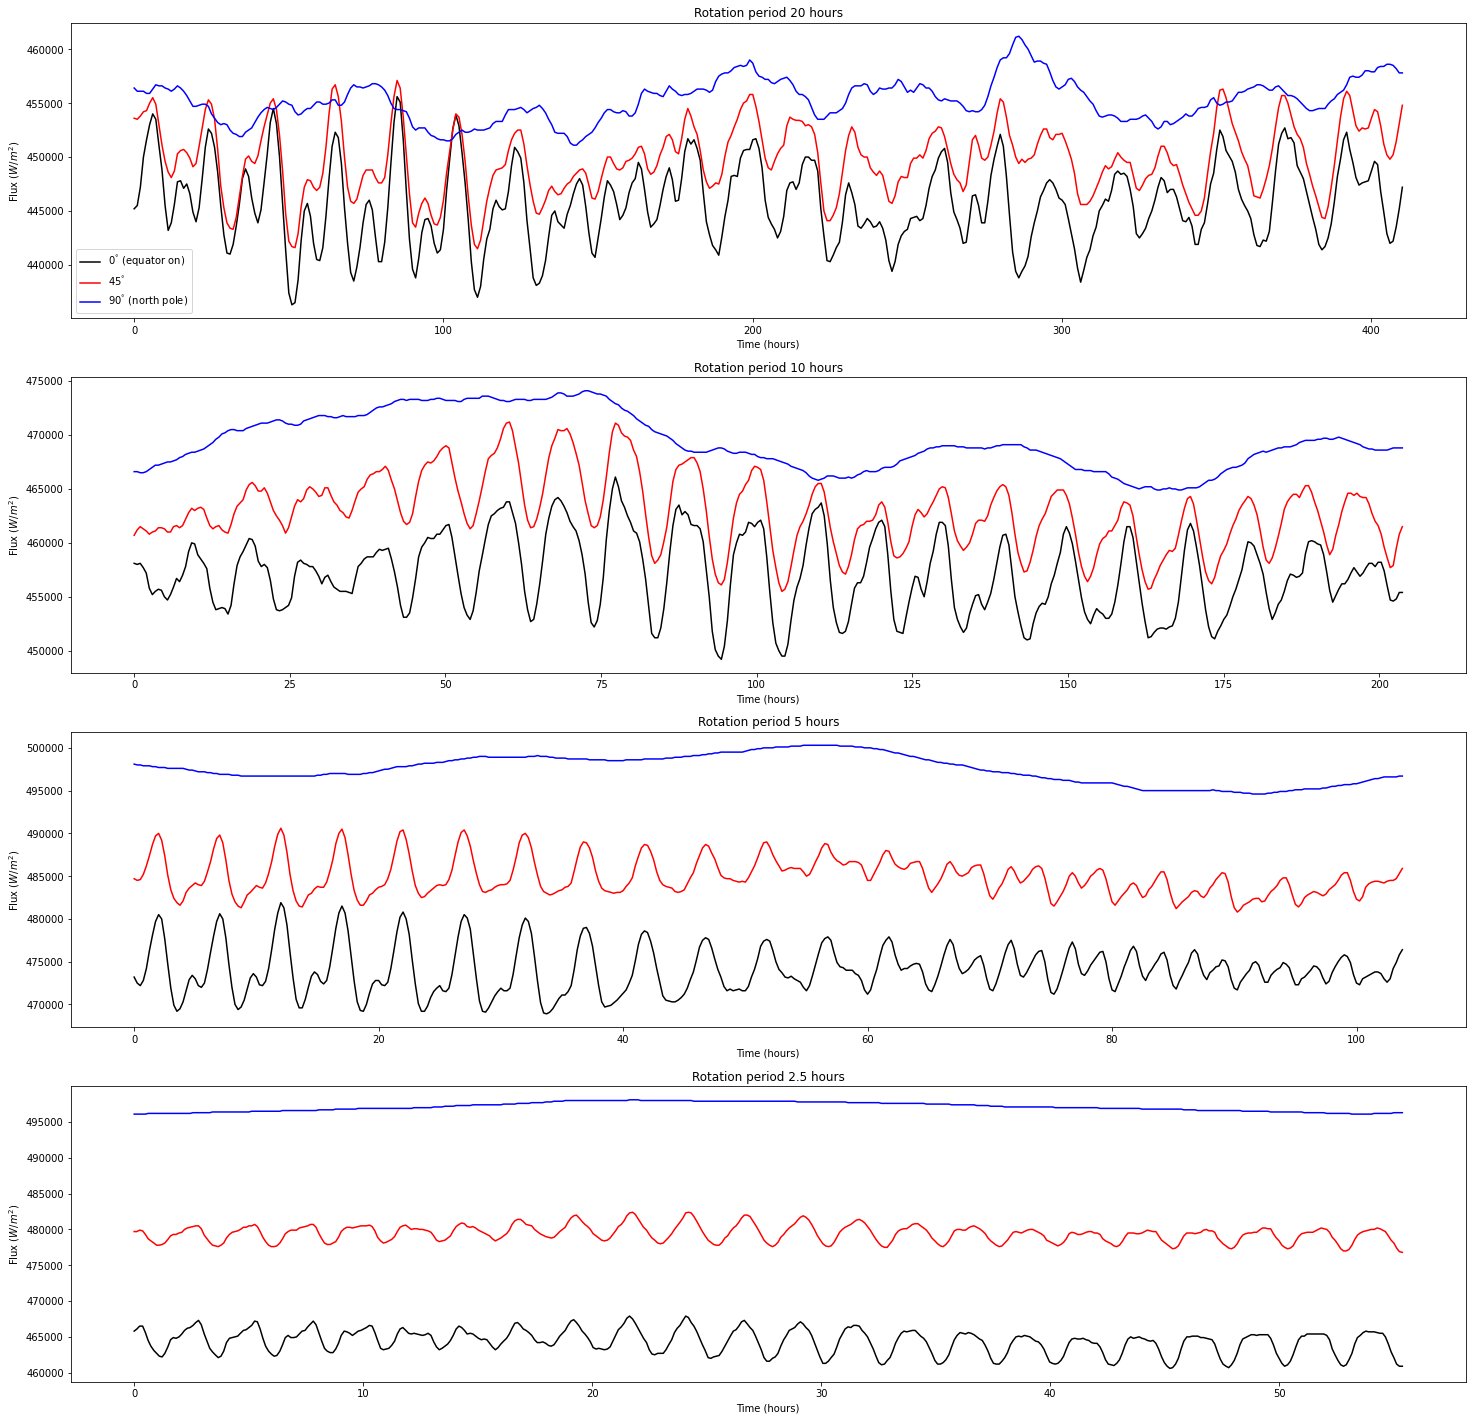

In [6]:
### Create multiplot of light curves of different rotation periods

## Make a multiplot with 4 subplots and configure figure size
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax.axis("off")

# Rotation period of 20 hours
ax1.plot(r20_d0[0],r20_d0[1],label="$0^\degree$ (equator on)",color='black')
ax1.plot(r20_d45[0],r20_d45[1],label="$45^\degree$",color="red")
ax1.plot(r20_d90[0],r20_d90[1],label="$90^\degree$ (north pole)" ,color="blue")
ax1.title.set_text("Rotation period 20 hours")
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Flux ($W/m^2$)")
#ax1.set_yticks(range(0,46000,100000))
ax1.legend()

# Rotation period of 10 hours
ax2.plot(r10_d0[0],r10_d0[1],label="$0^\degree$ (equator on)",color="black")
ax2.plot(r10_d45[0],r10_d45[1],label="$45^\degree$",color="red")
ax2.plot(r10_d90[0],r10_d90[1],label="$90^\degree$ (north pole)",color="blue")
ax2.title.set_text("Rotation period 10 hours")
#ax2.set_yticks(range(0,46000,100000))
ax2.set_xlabel("Time (hours)")
ax2.set_ylabel("Flux ($W/m^2$)")

# Rotation period of 5 hours
ax3.plot(r5_d0[0],r5_d0[1],label="$0^\degree$ (equator on)",color="black")
ax3.plot(r5_d45[0],r5_d45[1],label="$45^\degree$",color="red")
ax3.plot(r5_d90[0],r5_d90[1],label="$90^\degree$ (north pole)",color="blue")
ax3.title.set_text("Rotation period 5 hours")
ax3.set_xlabel("Time (hours)")
ax3.set_ylabel("Flux ($W/m^2$)")
#ax3.set_yticks(range(0,46000,100000))

# Rotation period of 2.5 hours
ax4.plot(r25_d0[0],r25_d0[1],label="$0^\degree$ (equator on)",color="black")
ax4.plot(r25_d45[0],r25_d45[1],label="$45^\degree$",color="red")
ax4.plot(r25_d90[0],r25_d90[1],label="$90^\degree$ (north pole)",color="blue")
ax4.title.set_text("Rotation period 2.5 hours")
ax4.set_xlabel("Time (hours)")
ax4.set_ylabel("Flux ($W/m^2$)")
#ax4.set_yticks(range(0,46000,100000))

plt.show()

In [7]:
### Normalize the light curves

## Rotation period 20 hours 0 degrees (equator on)
r20_d0_flux = r20_d0[1]
r20_d0_flux_median = np.median(r20_d0_flux)
r20_d0_flux_normalized = r20_d0_flux/r20_d0_flux_median

## Rotation period 20 hours 45 degrees
r20_d45_flux = r20_d45[1]
r20_d45_flux_median = np.median(r20_d45_flux)
r20_d45_flux_normalized = r20_d45_flux/r20_d45_flux_median

## Rotation period 20 hours 90 degrees (north pole)
r20_d90_flux = r20_d90[1]
r20_d90_flux_median = np.median(r20_d90_flux)
r20_d90_flux_normalized = r20_d90_flux/r20_d90_flux_median

## Rotation period 10 hours 0 degrees (equator on)
r10_d0_flux = r10_d0[1]
r10_d0_flux_median = np.median(r10_d0_flux)
r10_d0_flux_normalized = r10_d0_flux/r10_d0_flux_median

## Rotation period 10 hours 45 degrees
r10_d45_flux = r10_d45[1]
r10_d45_flux_median = np.median(r10_d45_flux)
r10_d45_flux_normalized = r10_d45_flux/r10_d45_flux_median

## Rotation period 10 hours 90 degrees (north pole)
r10_d90_flux = r10_d90[1]
r10_d90_flux_median = np.median(r10_d90_flux)
r10_d90_flux_normalized = r10_d90_flux/r10_d90_flux_median

## Rotation period 5 hours 0 degrees (equator on)
r5_d0_flux = r5_d0[1]
r5_d0_flux_median = np.median(r5_d0_flux)
r5_d0_flux_normalized = r5_d0_flux/r5_d0_flux_median

## Rotation period 5 hours 45 degrees
r5_d45_flux = r5_d45[1]
r5_d45_flux_median = np.median(r5_d45_flux)
r5_d45_flux_normalized = r5_d45_flux/r5_d45_flux_median

## Rotation period 5 hours 90 degrees (north pole)
r5_d90_flux = r5_d90[1]
r5_d90_flux_median = np.median(r5_d90_flux)
r5_d90_flux_normalized = r5_d90_flux/r5_d90_flux_median

## Rotation period 2.5 hours 0 degrees (equator on)
r25_d0_flux = r25_d0[1]
r25_d0_flux_median = np.median(r25_d0_flux)
r25_d0_flux_normalized = r25_d0_flux/r25_d0_flux_median

## Rotation period 2.5 hours 45 degrees
r25_d45_flux = r25_d45[1]
r25_d45_flux_median = np.median(r25_d45_flux)
r25_d45_flux_normalized = r25_d45_flux/r25_d45_flux_median

## Rotation period 2.5 hours 90 degrees (north pole)
r25_d90_flux = r25_d90[1]
r25_d90_flux_median = np.median(r25_d90_flux)
r25_d90_flux_normalized = r25_d90_flux/r25_d90_flux_median

In [8]:
### Creating arrays for the time of each light curve

## Rotation period 20 hours 0 degrees (equator on)
r20_d0_time = r20_d0[0]

## Rotation period 20 hours 45 degrees
r20_d45_time = r20_d45[0]

## Rotation period 20 hours 90 degrees (north pole)
r20_d90_time = r20_d90[0]

## Rotation period 10 hours 0 degrees (equator on)
r10_d0_time = r10_d0[0]

## Rotation period 10 hours 45 degrees
r10_d45_time = r10_d45[0]

## Rotation period 10 hours 90 degrees (north pole)
r10_d90_time = r10_d90[0]

## Rotation period 5 hours 0 degrees (equator on)
r5_d0_time = r5_d0[0]

## Rotation period 5 hours 45 degrees
r5_d45_time = r5_d45[0]

## Rotation period 5 hours 90 degrees (north pole)
r5_d90_time = r5_d90[0]

## Rotation period 2.5 hours 0 degrees (equator on)
r25_d0_time = r25_d0[0]

## Rotation period 2.5 hours 45 degrees
r25_d45_time = r25_d45[0]

## Rotation period 2.5 hours 90 degrees (north pole)
r25_d90_time = r25_d90[0]

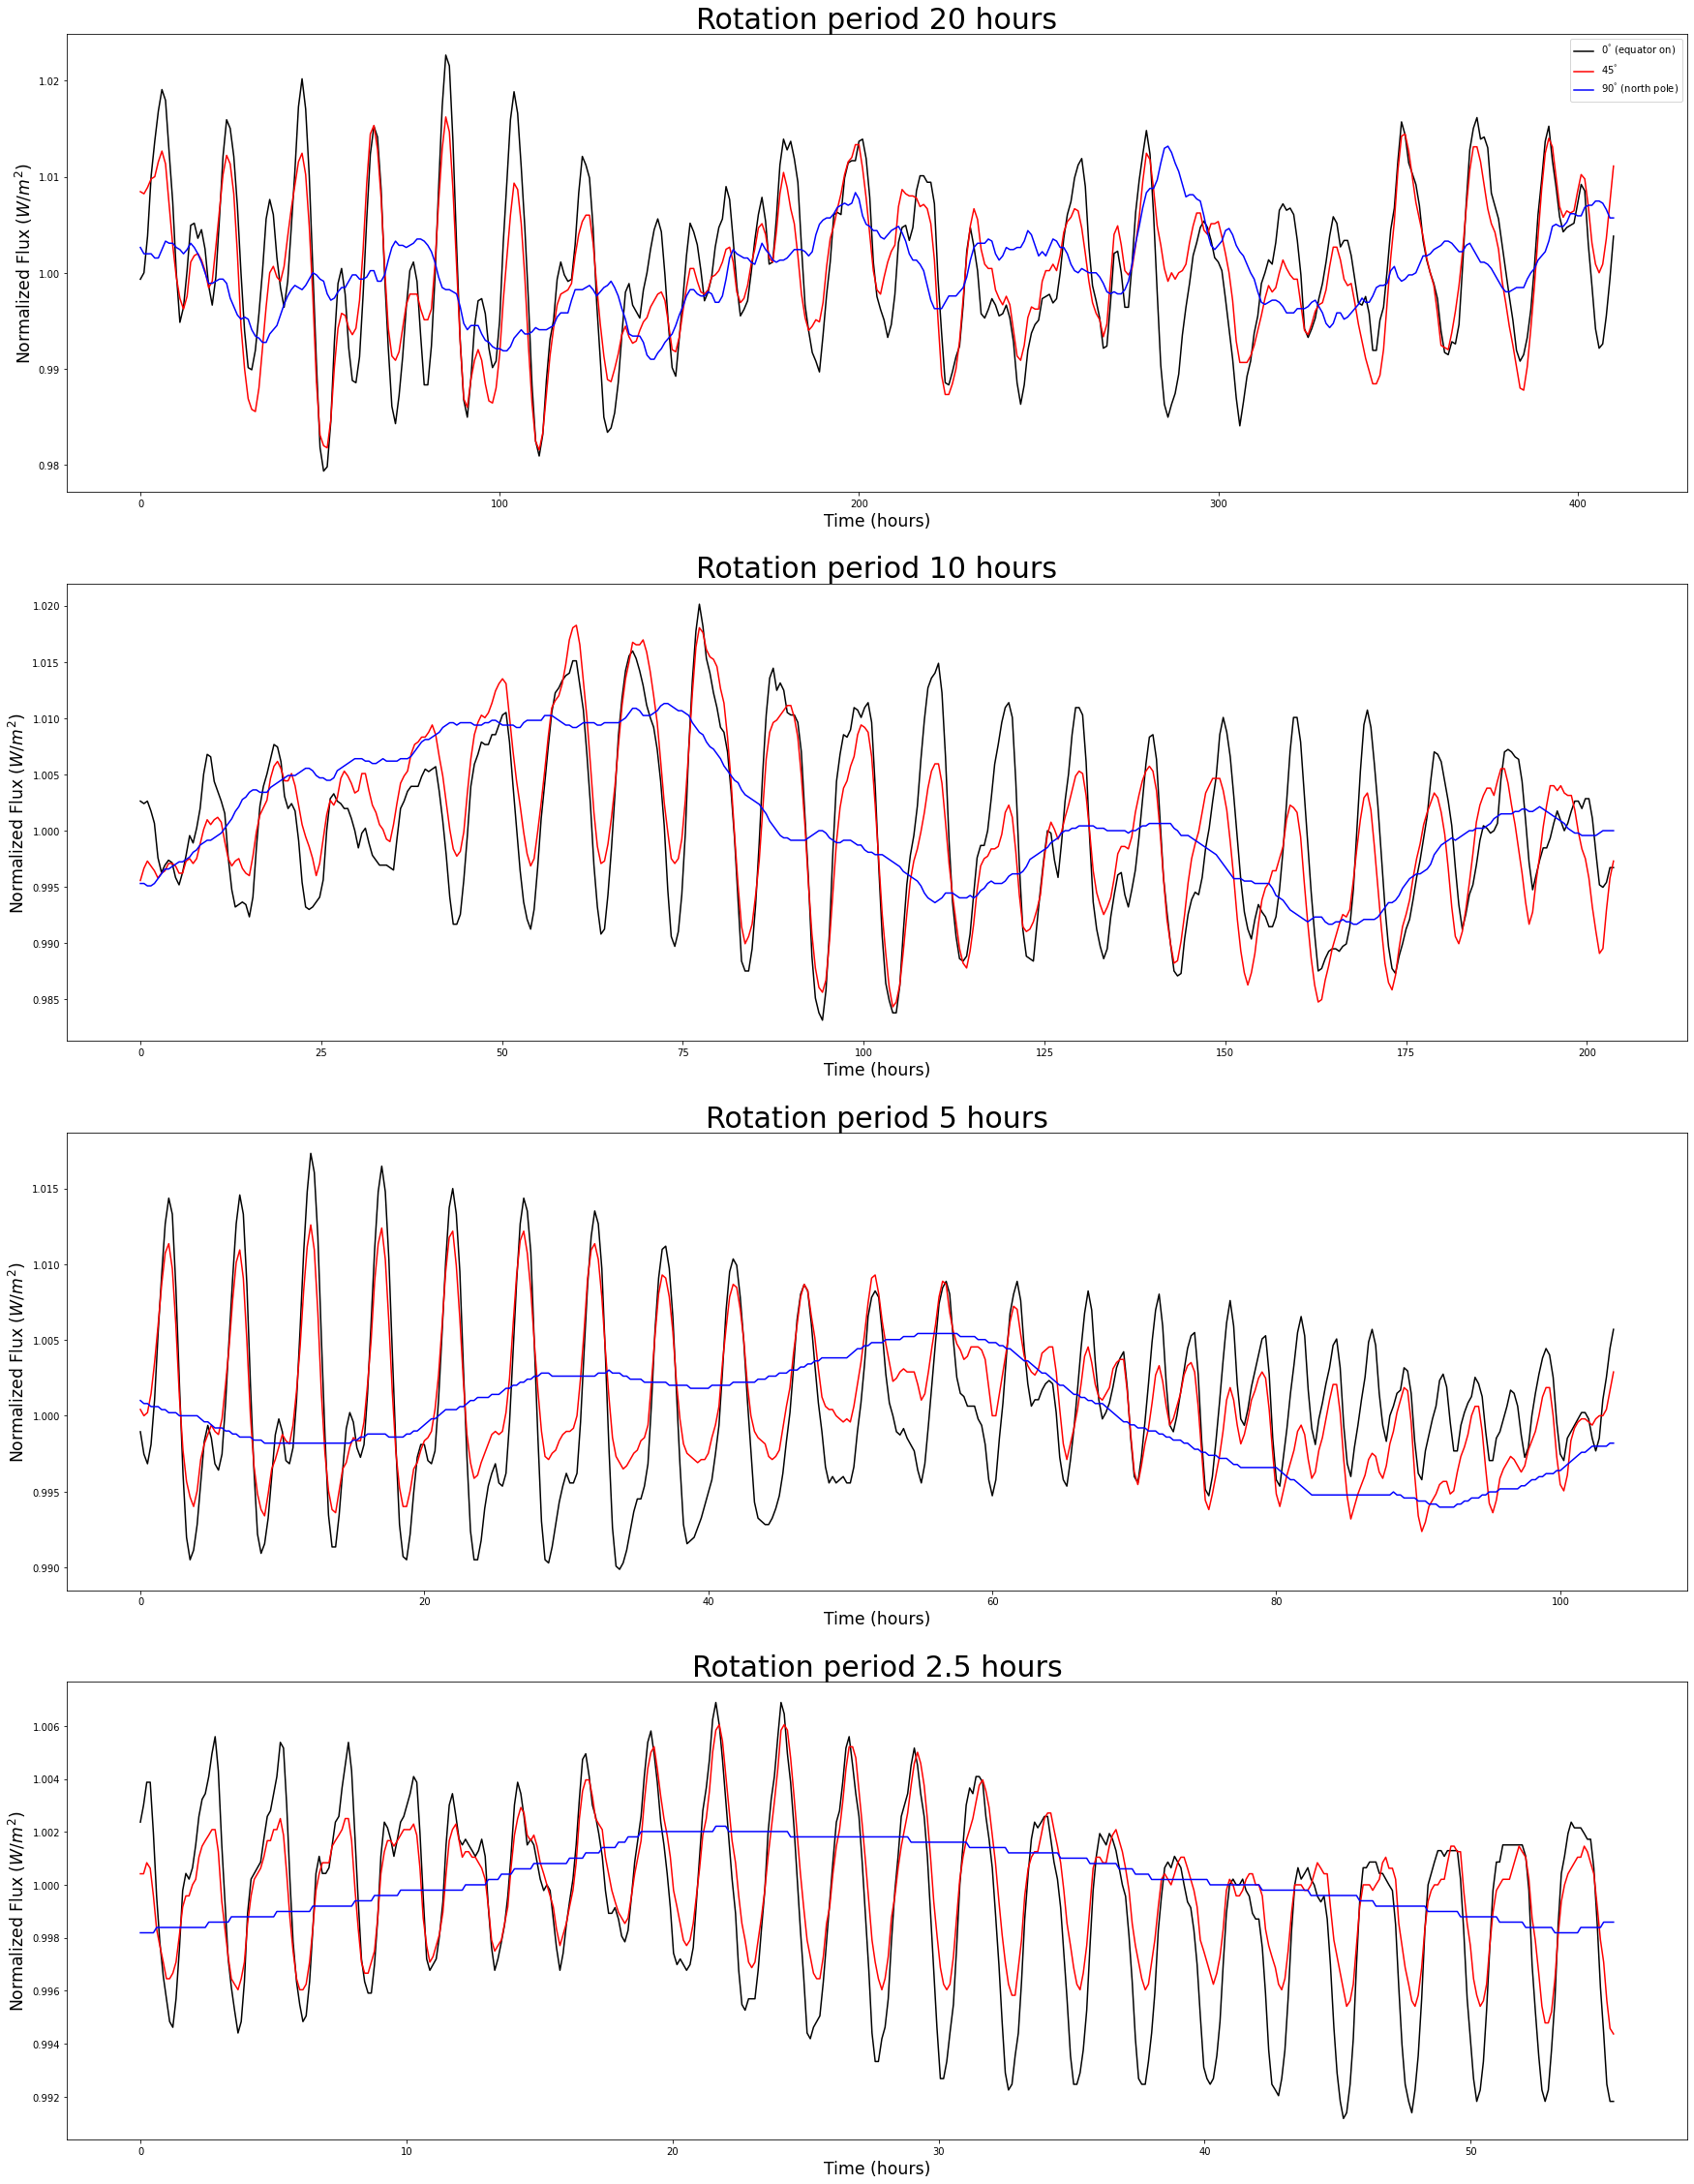

In [47]:
### Create multiplot of normalized light curves of different rotation periods

## Make a multiplot with 4 subplots and configure figure size
fig = plt.figure(figsize = (30,40))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax.axis("off")

# Rotation period of 20 hours
ax1.plot(r20_d0[0],r20_d0_flux_normalized,label="$0^\degree$ (equator on)",color='black')
ax1.plot(r20_d45[0],r20_d45_flux_normalized,label="$45^\degree$",color="red")
ax1.plot(r20_d90[0],r20_d90_flux_normalized,label="$90^\degree$ (north pole)" ,color="blue")
ax1.set_title("Rotation period 20 hours",fontsize= 30)
ax1.set_xlabel("Time (hours)",size='xx-large')
ax1.set_ylabel("Normalized Flux ($W/m^2$)",size='xx-large')
#ax1.set_yticks(range(0,46000,100000))
ax1.legend()

# Rotation period of 10 hours
ax2.plot(r10_d0[0],r10_d0_flux_normalized,label="$0^\degree$ (equator on)",color="black")
ax2.plot(r10_d45[0],r10_d45_flux_normalized,label="$45^\degree$",color="red")
ax2.plot(r10_d90[0],r10_d90_flux_normalized,label="$90^\degree$ (north pole)",color="blue")
ax2.set_title("Rotation period 10 hours",fontsize= 30)
#ax2.set_yticks(range(0,46000,100000))
ax2.set_xlabel("Time (hours)",size='xx-large')
ax2.set_ylabel("Normalized Flux ($W/m^2$)",size='xx-large')

# Rotation period of 5 hours
ax3.plot(r5_d0[0],r5_d0_flux_normalized,label="$0^\degree$ (equator on)",color="black")
ax3.plot(r5_d45[0],r5_d45_flux_normalized,label="$45^\degree$",color="red")
ax3.plot(r5_d90[0],r5_d90_flux_normalized,label="$90^\degree$ (north pole)",color="blue")
ax3.set_title("Rotation period 5 hours",fontsize= 30)
ax3.set_xlabel("Time (hours)",size='xx-large')
ax3.set_ylabel("Normalized Flux ($W/m^2$)",size='xx-large')
#ax3.set_yticks(range(0,46000,100000))

# Rotation period of 2.5 hours
ax4.plot(r25_d0[0],r25_d0_flux_normalized,label="$0^\degree$ (equator on)",color="black")
ax4.plot(r25_d45[0],r25_d45_flux_normalized,label="$45^\degree$",color="red")
ax4.plot(r25_d90[0],r25_d90_flux_normalized,label="$90^\degree$ (north pole)",color="blue")
ax4.set_title("Rotation period 2.5 hours",fontsize= 30)
ax4.set_xlabel("Time (hours)",size='xx-large')
ax4.set_ylabel("Normalized Flux ($W/m^2$)",size='xx-large')
#ax4.set_yticks(range(0,46000,100000))

plt.show()